# Statistics & Public Health
## Part 1: Cleaning and EDA


**BrainStation**

## Introduction

The West Nile Virus (WNV), a viral mosquito-borne disease, is transmitted to a person when an infected mosquito bites them. 

In this notebook, we will explore a sample of mosquito tracking data from the city of Chicago, Illinois. Chicago has been tracking the mosquito populations and the WNV prevalence using a series of traps they placed around the city. This project aims to better understand the WNV spread in the city based on the characteristics of the mosquitos and traps, and locations. This notebook focuses on Part 1 of the project, namely the Data Cleaning and Exploratory Data Analysis (EDA).

***

## Table of Contents <a class="anchor" id="toc"></a>

- [The Dataset](#the-dataset)
- [Data Cleaning and Preparation](#data-cleaning-and-preparation)
    - [Converting Data Types](#converting-data-types)
    - [Duplicated Information](#duplicated-information)
    - [Distribution of Data](#distribution-of-data)
    - [Null Values](#null-values)
    - [Saving the Clean Dataset](#saving-the-clean-dataset)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Number of Mosquitoes by Date](#number-of-mosquitoes-by-date)
    - [WNV Prevalence by Species](#wnv-prevalence-by-species)
    - [Number of Mosquitoes by Trap Type](#number-of-mosquitoes-by-trap-type)
    - [Number of Mosquitoes by Number of Traps and WNV Prevalence per Year](#mosquitoes-by-traps-and-wnv-per-year)
- [Conclusion](#conclusion)

***

## The Dataset <a class="anchor" id="the-dataset"></a>

The dataset is composed of the variables in the table below.

| COLUMN NAME | DESCRIPTION | DATA TYPE | NOTES |
| :- | :- | :-: | :- |
| Year | Year that the WNV test is performed | int64 | 2007 to 2019 |
| Week | Week that the WNV test is performed | int64 | |
| Address Block | Address of the location of trap | string | |
| Block | Block number of address | int64 | |
| Trap | Id of the trap | string | Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220. |
| Trap type | Type of trap | string | |
| Date | Date and time that the WNV test is performed | string | Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time. |
| Mosquito number | Number of mosquitoes caught in this trap | int64 | These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50. |
| Mosquito ID | Id for Mosquito species | string| |
| WNV Present | Whether West Nile Virus was present in these mosquitoes | string| |
| Species | Mosquito species | string | |
| Lat | Latitude of trap | float64 | |
| Lon | Longitude of trap | float64 | |

Let's import the relevant packages to analyze the data.

In [1]:
# Importing the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Now, let's read the data and take a first look at the dataset.

In [3]:
# Reading the csv file into a dataframe
mosquito_df = pd.read_csv('./CSV Files/mosquito_data.csv')

# Checking the first 5 rows of the dataframe
mosquito_df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
# Counts the rows and columns of the dataframe
print(f'This dataset has {mosquito_df.shape[0]} rows and {mosquito_df.shape[1]} columns.')

This dataset has 18495 rows and 13 columns.


In [5]:
# Checking the information about the dataframe including the index, columns, non-null values, and dtypes.
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


This dataset has 18,495 rows and 13 columns. There are 3 datatypes that encode the data: strings, integers, and decimals. 7 columns encode objects, 4 columns encode integers, and 2 columns encode decimals.

<a class="anchor" id="same-information"></a>
There are missing values in the `Lat` and `Lon` columns. `Address Block` and `Block` contain the same information where `Block` is just the numerical part of `Address Block`. `Mosquito ID` and `Species` also contain the same information where `Mosquito ID` is the shortened form of `Species`.

We can now move on to clean and prepare the data for analyses.

## Data Cleaning and Preparation <a class="anchor" id="data-cleaning-and-preparation"></a>

Before proceeding with data cleaning and analysis, it's advisable to create a copy of the dataset. This ensures that the original dataset remains intact and can be referred back to if necessary. Creating a duplicate dataset for cleaning and analysis helps maintain data integrity and provides a safeguard against inadvertent modifications to the original data.

In [6]:
mosquito_dfc = mosquito_df.copy()

Now, the data can be cleaned to prepare it to be used for data analysis.

### Converting Data Types <a class="anchor" id="converting-data-types"></a>

The datatype for the `Date` column is currently as an `object`. To be able to use it and extract the date and time from it, it has to be converted to the `datetime` format.

In [7]:
# Converts "Date" column to datetime format
mosquito_dfc['Date'] = pd.to_datetime(mosquito_dfc['Date'])

In [8]:
# Confirming that the "Date" dtype changed to datetime format
mosquito_dfc.dtypes

Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

In [9]:
# Checking to see what period the dataset covers
print(f"This dataset covers the period between {mosquito_dfc['Date'].min()} and {mosquito_dfc['Date'].max()}.")

This dataset covers the period between 2007-05-29 00:05:00 and 2019-09-26 00:09:00.


To easier analyze the data in regard to the date, the month should be extracted from the `Date` column and inserted into the dataset as a new column labeled `Month`.

In [10]:
# Extracts the month from "Date" and creates and inputs month in new column 
mosquito_dfc['Month'] = mosquito_dfc['Date'].dt.month

In [11]:
# Checking to see if the "Month" column was added to the dataset
mosquito_dfc.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN,9
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,9


From the table above, the `Month` column is shown at the end of the table. The value in that column is the numeric form of the month. To make it easier to read the month, the numeric format will be converted to the month name. To convert to the month name, the `calendar` library will need to be used. The `calendar` library was imported in the beginning with the other relevant packages.

In [12]:
# Applies the name of the calendar month for the respective month number (e.g. 8 -> Aug)
month_names = mosquito_dfc['Month'].apply(lambda x: calendar.month_name[x])

# Insert abbreviated calendar month into new column, "Month"
mosquito_dfc['Month'] = month_names

In [13]:
# Checking that the abbreviated calendar months is shown in the "Month" column
mosquito_dfc.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN,September
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,September
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,September
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,September
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,September


Now that the name of the months are populated in the `Month` column, when we analyze the data, we would like it to appear in the order of the month number and not alphabetically. The next steps would be to sort the dataset by the order of the months.

In [14]:
# Checking to see what months the dataset covers
print(f"This dataset covers the period between {mosquito_dfc['Month'].min()} and {mosquito_dfc['Month'].max()}.")

This dataset covers the period between August and September.


In [15]:
# Returns the first day of the each month within the stated date range
# Used the first of the month so that May can be included as well
dates_in_order = pd.date_range(start='2007-05-01', end='2007-10-01', freq='MS')
dates_in_order

DatetimeIndex(['2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [16]:
# Map the month integers to their proper names
months_in_order = dates_in_order.map(lambda x: x.month_name()).to_list()
months_in_order

['May', 'June', 'July', 'August', 'September', 'October']

In [17]:
# Changes the datatype of the "Month" column to categorical
# Allows it to keep the order of the month when analyzing data
mosquito_dfc.Month = pd.Categorical(
    mosquito_dfc.Month,
    categories=months_in_order,
    ordered=True)

In [18]:
# Sorts "Month" column by order of the months
mosquito_dfc.sort_values('Month')

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Month
12719,2009,20,100XX W OHARE AIRPORT,100,T915,GRAVID,2009-05-28 00:05:00,30,Res,negative,CULEX RESTUANS,NaN,NaN,May
12713,2009,20,4XX W 127TH,4,T135,GRAVID,2009-05-28 00:05:00,5,Res,negative,CULEX RESTUANS,NaN,NaN,May
12712,2009,20,127XX S DOTY AVE,127,T115,GRAVID,2009-05-28 00:05:00,1,Pip,negative,CULEX PIPIENS,41.662387,-87.590180,May
15494,2007,21,89XX S CARPENTER ST,89,T159,GRAVID,2007-05-29 00:05:00,1,Res,negative,CULEX RESTUANS,41.731447,-87.649722,May
15493,2007,21,11XX W ROOSEVELT RD,11,T048,GRAVID,2007-05-29 00:05:00,2,Res,negative,CULEX RESTUANS,41.866915,-87.654919,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,2007,39,35XX W 51ST ST,35,T062,CDC,2007-10-04 00:10:00,12,Pip,positive,CULEX PIPIENS,41.800601,-87.711724,October
13752,2007,39,41XX N OAK PARK AVE,41,T002,GRAVID,2007-10-04 00:10:00,6,Pip,negative,CULEX PIPIENS,41.956299,-87.797517,October
13751,2007,39,11XX W ROOSEVELT RD,11,T048,GRAVID,2007-10-04 00:10:00,6,Pip,negative,CULEX PIPIENS,41.866915,-87.654919,October
13763,2007,39,5XX N STREETER DR,5,T129,GRAVID,2007-10-04 00:10:00,1,Res,negative,CULEX RESTUANS,41.891513,-87.609785,October


The dataset is now sorted by order of the months. Now, we check the dataset to make sure everything looks right before moving on.

In [19]:
# Checking the shape of the dataset
print(f'This dataset now has {mosquito_dfc.shape[0]} rows and {mosquito_dfc.shape[1]} columns.')

This dataset now has 18495 rows and 14 columns.


In [20]:
# Checking the information of dataset
mosquito_dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
 13  Month            18495 non-null  category      
dtypes: category(1), datetime64[ns](1), flo

Since everything looks good, we can move on to checking the dataset for duplicated rows.

### Duplicated Information <a class="anchor" id="duplicated-information"></a>

When analyzing data, we should check to see if there are any duplicate information. If there are, we should look into what information is duplicated to determine the best way to handle those duplicates. The dataset will now be checked for duplicated rows and columns.

In [21]:
# Counts the number of rows that contain duplicate information in the dataframe
duplicated_rows = mosquito_dfc.duplicated()
duplicated_columns = mosquito_dfc.T.duplicated()
print(f'There are {duplicated_rows.sum()} duplicated rows and {duplicated_columns.sum()} duplicated columns.')

There are 658 duplicated rows and 0 duplicated columns.


In [22]:
# Calculates the percentage of rows that have duplicates
print(f'The percentage of duplicated rows is {round(duplicated_rows.mean(), 5)}.')

The percentage of duplicated rows is 0.03558.


We see that there are no duplicated columns. However, **3.56%** of the rows in the dataset are duplicated. We will now look into the rows to see if they are actual duplicates.

In [23]:
# Sorting and looking into the first 20 duplicated rows
mosquito_dfc[duplicated_rows].sort_values(by = ['Trap type','Species','Address Block','Lat','Lon','Date','Mosquito number']).head(20)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Month
15849,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN,August
17477,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN,August
18120,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN,August
18161,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN,August
18467,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN,August
17486,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,August
17613,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,August
17733,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN,August
16648,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN,August
17409,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN,August


Upon reviewing the table above, it's apparent that several rows contain identical information. This duplication likely occurred due to instances where the number of mosquitoes exceeded 50, necessitating a split into multiple records. However, upon closer examination, it's evident that in the majority of cases, the mosquito count remains below 50. It's improbable that four separate instances of exactly 50 mosquitoes of the same species were observed simultaneously at the same location and trap. Hence, it's reasonable to conclude that these are indeed duplicates and should be eliminated from the dataset.

In [24]:
# Drops the duplicates in the source dataframe
mosquito_dfc.drop_duplicates(inplace = True)

Now, we will make sure that there are no more duplicated rows in the dataset.

In [25]:
# Checking to make sure there are no more duplicated rows
duplicated_rows = mosquito_dfc.duplicated().sum()
print(f'There are {duplicated_rows} duplicated rows.')

There are 0 duplicated rows.


[Earlier](#same-information), we also stated that `Address Block` and `Block` as well as `Mosquito ID` and `Species` contained the same information. Since this is the case, we can drop the `Block` and `Mosquito ID` columns.

In [26]:
# Drops the "Block" and "Mosquito ID" columns
mosquito_dfc = mosquito_dfc.drop(columns = ['Block', 'Mosquito ID'])

### Distribution of Data <a class="anchor" id="distribution-of-data"></a>

It would be a good time to look at the distibution of data of some columns. It is a more accurate distribution of data once the duplicate and null values are properly dealt with in the dataset. We will be looking at 2 numeric and 2 categorical columns. For the numeric columns, it would be difficult to view the distribution after dealing with the null values as we may need to convert the data type to an object(`string`). This is why the distribution of data will be viewed prior to dealing with null values.

To view the distribution of the numeric columns, the frequency of the data will by plotted on histograms. The distribution for the numeric columns, `Lat` and `Lon`, are shown below.

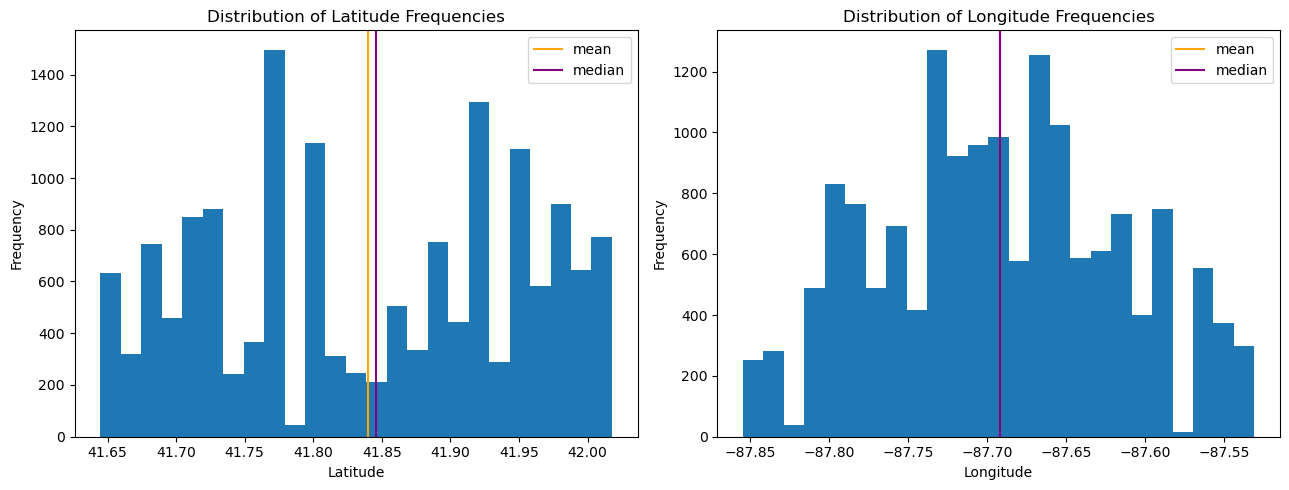

In [27]:
# Creates subplots, one row, two columns (2 histogram plots)
plt.subplots(1, 2, figsize = (13,5))

# Histogram of the "Lat" column
plt.subplot(1, 2, 1)
plt.hist(mosquito_dfc['Lat'], bins = 25)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude Frequencies')
plt.axvline(mosquito_dfc['Lat'].mean(),color = 'orange', label = 'mean')
plt.axvline(mosquito_dfc['Lat'].median(),color = 'purple', label = 'median')
plt.legend()

# Histogram of the "Lon" column
plt.subplot(1, 2, 2)
plt.hist(mosquito_dfc['Lon'], bins = 25)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude Frequencies')
plt.axvline(mosquito_dfc['Lon'].mean(),color = 'orange', label = 'mean')
plt.axvline(mosquito_dfc['Lon'].median(),color = 'purple', label = 'median')
plt.legend()

# Makes sure there is no overlap in plots
plt.tight_layout()

# Shows the subplots
plt.show()

The two numeric columns, `Lat` and `Lon`, store float values (decimals). The mean and median values were added to the histograms to assist in defining the distribution of the data. In the "Distribution of Latitude Frequencies", the mean is slightly less than the median. However, there are two peaks, one of the left side and one on the right. This would indicate a bimodal distribution. In the "Distribution of Longitude Frequencies", the mean and median values over lap. This would indicate a normal distribution. The bell-curve shape of the distribution also confirms there is a normal distribution of data.

When looking at the map, those `Lat` and `Lon` coordinates with the lower count are near Lake Michigan and those with the higher counts are more inland. An explanation may be that there are more people concentrated inland. A mosquito habitat is any place with standing water and people tend to create mosquito habitats by leaving things outside that can accumulate water.

To view the distribution of the categorical columns, the frequency will be plotted on horizontal bar charts. The distribution for the categorical columns, `Trap type` and `Species`, are shown below.

<a class="anchor" id="trap-type-distribution"></a>

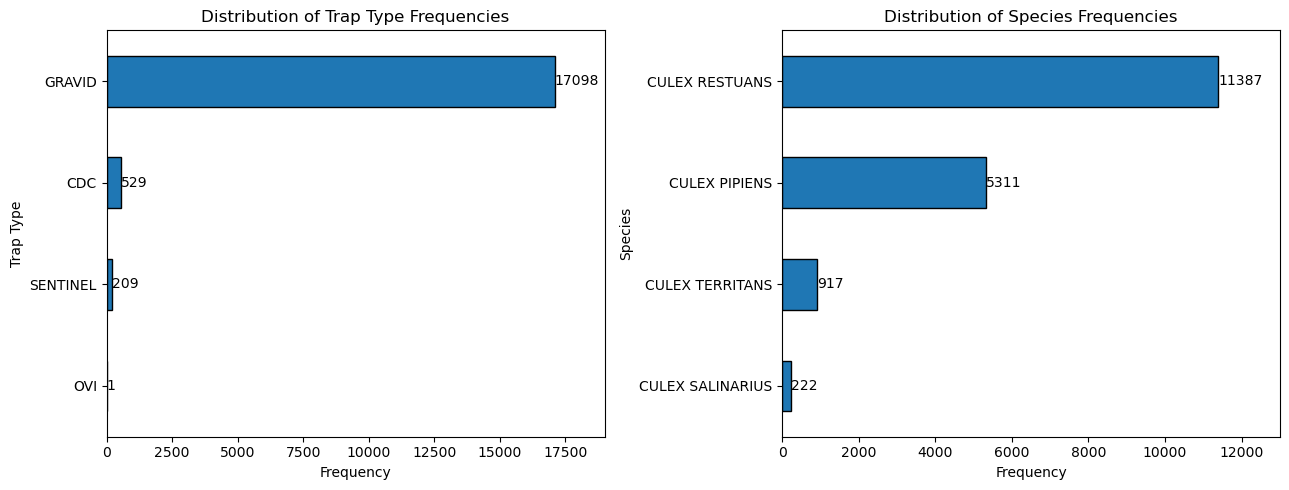

In [28]:
# Creates subplots, one row, two columns (2 horizontal bar plots)
plt.subplots(1, 2, figsize = (13,5))

# Bar chart of the "Trap type" column
plt.subplot(1, 2, 1)
ax = mosquito_dfc['Trap type'].value_counts().plot.barh(edgecolor = 'black')

# Bar chart of the "Species" column
plt.subplot(1, 2, 2)
bx = mosquito_dfc['Species'].value_counts().plot(kind = 'barh', edgecolor = 'black')

# Update plot properties
ax.set_xlabel('Frequency')
ax.set_ylabel('Trap Type')
ax.set_title('Distribution of Trap Type Frequencies')
ax.set_xlim(0,19000)
bx.set_xlabel('Frequency')
bx.set_ylabel('Species')
bx.set_title('Distribution of Species Frequencies')
bx.set_xlim(0,13000)

# Adds labels to the data bars
ax.bar_label(ax.containers[0])
bx.bar_label(bx.containers[0])

# Reverse the y-axis order
ax.invert_yaxis()
bx.invert_yaxis()

# Makes sure there is no overlap in plots
plt.tight_layout()

# Shows the subplots
plt.show()

The two categorical columns, `Trap type` and `Species` , store string values. For `Trap type`, the frequency distribution is really skewed to one trap type, with about 96% of the trap type being `GRAVID`. For `Species`, the frequency distribution is skewed to the species, `CULEX RESTUANS`, with it accounting for about 64% of the species type. `CULEX PIPIENS` comes in second, accounting for about 30% of the species type. There were not many species of `CULEX TERRITANS` and `CULEX SALINARIUS` throughout the dataset.

### Null Values <a class="anchor" id="null-values"></a>

Now that we know the distibution of some of the columns of the dataset, the null values can be appropriately dealt with so they do not skew the data analysis. 

In [29]:
# Counts the number of null values in each column
mosquito_dfc.isnull().sum()

Year                  0
Week                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2266
Lon                2266
Month                 0
dtype: int64

In [30]:
# Calculates the percentage of null values in each column
round(mosquito_dfc.isnull().mean(), 5)

Year               0.00000
Week               0.00000
Address Block      0.00000
Trap               0.00000
Trap type          0.00000
Date               0.00000
Mosquito number    0.00000
WNV Present        0.00000
Species            0.00000
Lat                0.12704
Lon                0.12704
Month              0.00000
dtype: float64

Based on the calculations above, both the `Lat` and `Lon` columns contain 12.7% null values. There are many ways of dealing with null values, such as dropping those rows or imputing another value. For our purposes, we will impute another value because that data has information that we need in our analysis. `Lat` and `Lon` are coordinates that specify location. We should not input the value as `0` since that would indicate an incorrect coordinate. The best approach would be to find the unique addresses in `Address Block` that corresponds to the missing Lat / Lon values and use Google to help fill those in.

In [31]:
# Finding unique addresses
mosquito_dfc.loc[mosquito_dfc['Lat'].isnull(), 'Address Block'].unique().tolist()

['100XX W OHARE AIRPORT',
 '4XX W 127TH',
 '100XX W OHARE',
 '81XX S ASHLAND',
 '79XX S CHICAGO',
 '98XX S AVENUE G',
 '65XX N OAK PARK AVE',
 '115XX S AVENUE L',
 '30XX S HOYNE',
 '43XX N ASHLAND']

The unique addresses are stated above. However, we see that there may be a duplicate address, `100XX W OHARE AIRPORT` and `100XX W OHARE`. It seems that the addresses are referring to the location of an airport. To maintain uniformity, we can replace all instances of `100XX W OHARE` with `100XX W OHARE AIRPORT`. 

In [32]:
# Changes all instances of "100XX W OHARE" to "100XX W OHARE AIRPORT"
mosquito_dfc.loc[mosquito_dfc['Address Block'] == '100XX W OHARE', 'Address Block'] = '100XX W OHARE AIRPORT'

In [33]:
# Checking unique addresses
mosquito_dfc.loc[mosquito_dfc['Lat'].isnull(), 'Address Block'].unique().tolist()

['100XX W OHARE AIRPORT',
 '4XX W 127TH',
 '81XX S ASHLAND',
 '79XX S CHICAGO',
 '98XX S AVENUE G',
 '65XX N OAK PARK AVE',
 '115XX S AVENUE L',
 '30XX S HOYNE',
 '43XX N ASHLAND']

Now that we have all the unique addresses with no duplicates, we can go ahead and find the latitude and longitude coordinates of each address to impute it into the dataset.

In [34]:
# Latitude information for the addresses
loc_lat = {'100XX W OHARE AIRPORT': 41.98034,
           '4XX W 127TH': 41.66368,
           '81XX S ASHLAND': 41.74666,
           '79XX S CHICAGO': 41.75163,
           '98XX S AVENUE G': 41.71788,
           '65XX N OAK PARK AVE': 41.99934,
           '115XX S AVENUE L': 41.68654,
           '30XX S HOYNE': 41.83680,
           '43XX N ASHLAND': 41.96002
}

In [35]:
# Longitude information for the addresses
loc_lon = {'100XX W OHARE AIRPORT': -87.90897,
           '4XX W 127TH': -87.63203,
           '81XX S ASHLAND': -87.66375,
           '79XX S CHICAGO': -87.58556,
           '98XX S AVENUE G': -87.53166,
           '65XX N OAK PARK AVE': -87.79564,
           '115XX S AVENUE L': -87.53651,
           '30XX S HOYNE': -87.67777,
           '43XX N ASHLAND': -87.66938
}

In [36]:
# Imputing the latitude information
mosquito_dfc['Lat'] = mosquito_dfc['Lat'].fillna(mosquito_dfc['Address Block'].apply(lambda x: loc_lat.get(x)))

# Imputing the longitude information
mosquito_dfc['Lon'] = mosquito_dfc['Lon'].fillna(mosquito_dfc['Address Block'].apply(lambda x: loc_lon.get(x)))

The latitude and longitude values should have been imputed into the dataset. We can check to make sure that it the case.

In [37]:
# Checking to make sure there are no more NaN values
mosquito_dfc.isnull().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

The data cleaning and preparation are done. We can do a final check on the dataset.

In [38]:
# Counts the number of rows and columns in the dataset
print(f'There are {mosquito_dfc.shape[0]} rows and {mosquito_dfc.shape[1]} columns.')

There are 17837 rows and 12 columns.


In [39]:
# Checking the information about the dataframe
mosquito_dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  int64         
 1   Week             17837 non-null  int64         
 2   Address Block    17837 non-null  object        
 3   Trap             17837 non-null  object        
 4   Trap type        17837 non-null  object        
 5   Date             17837 non-null  datetime64[ns]
 6   Mosquito number  17837 non-null  int64         
 7   WNV Present      17837 non-null  object        
 8   Species          17837 non-null  object        
 9   Lat              17837 non-null  float64       
 10  Lon              17837 non-null  float64       
 11  Month            17837 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.7+ MB


[[Back to top]](#toc)

***

## Exploratory Data Analysis (EDA) <a class="anchor" id="exploratory-data-analysis-eda"></a>

The dataset is now cleaned and ready for EDA.

#### Number of Mosquitoes by Date <a class="anchor" id="number-of-mosquitoes-by-date"></a>

First, we'll explore the relationship between `Mosquito number` and `Date`. To do that, we want to sum up the number of mosquitoes by both the `Year` and `Month` columns to see if there is a trend.

In [41]:
# Grouping by year to get the total number of mosquitoes for each year
dfc_year = mosquito_dfc.groupby('Year')['Mosquito number'].sum()
dfc_year

Year
2007    24156
2008     3882
2009     5462
2010     7363
2011     7256
2012    10703
2013    22855
2014    29767
2015    10332
2016    32454
2017     9104
2018    13364
2019     9856
Name: Mosquito number, dtype: int64

In [42]:
# Grouping by month to get the total number of mosquitoes for each month
dfc_month = mosquito_dfc.groupby('Month')['Mosquito number'].sum()
dfc_month

Month
May            116
June         27760
July         54338
August       75601
September    27529
October       1210
Name: Mosquito number, dtype: int64

The data is ready to visualize to see if there are trends by either year and/or month. We will be using bar charts to visualize the data.

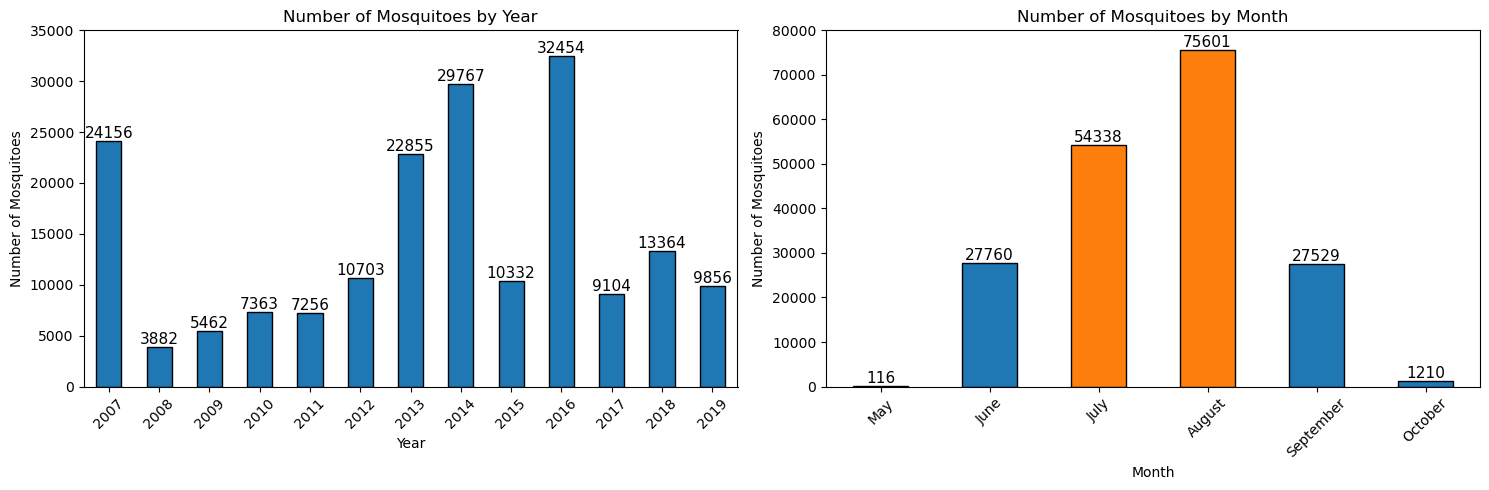

In [43]:
# Creates subplots, one row, two columns (2 bar charts)
plt.subplots(1, 2, figsize = (15,5))

# Bar chart of the total number of mosquitoes by the year
plt.subplot(1, 2, 1) 
ax = dfc_year.plot.bar(x = 'Year', y = 'Mosquito number', edgecolor = 'black')

# Bar chart of the total number of mosquitoes by the month
plt.subplot(1, 2, 2) 
my_colors = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:blue', 'tab:blue']
bx = dfc_month.plot.bar(x = 'Month', y = 'Mosquito number', color = my_colors, edgecolor = 'black')

# Update plot properties
ax.set_xlabel('Year')
ax.set_ylabel('Number of Mosquitoes')
ax.set_title('Number of Mosquitoes by Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_ylim(0, 35000)
bx.set_xlabel('Month')
bx.set_ylabel('Number of Mosquitoes')
bx.set_title('Number of Mosquitoes by Month')
bx.set_xticklabels(bx.get_xticklabels(), rotation = 45)
bx.set_ylim(0, 80000)

# Adds labels to the data bars
ax.bar_label(ax.containers[0], size = 11)
bx.bar_label(bx.containers[0], size = 11)

# Makes sure there is no overlap in plots
plt.tight_layout()

# Shows the plots
plt.show()

In the plot, "Number of Mosquitoes by Year", there were a few years where the total number of mosquitoes were high (2007, 2013, 2014, and 2016). There is no obvious trend that can be seen when grouped by year. However, in the plot, "Number of Mosquitoes by Month", **there are more mosquitoes caught in July and August** than the other months. August accounts for 41% and July accounts for 29% of the total number of mosquitoes caught from the period of 2017-2019. Mosquito season slowly starts late spring and lasts until early fall and they are most active in the warmest summer months. This pattern can be seen in the "Number of Mosquitoes by Month" plot.

#### WNV Prevalence by Species <a class="anchor" id="wnv-prevalence-by-species"></a>

Next, we want to explore the relationship between whether WNV was present or absent and `Species`. First, we'll do some calculations and see if we can uncover any insights. Then, we'll visualize the data by creating a grouped bar chart. On this chart, each bar on the x-axis represents a distinct mosquito species, while the y-axis denotes the count of occurrences. The presence or absence of WNV will be distinguished by two distinct colors, allowing for a clear comparison between the two conditions.

In [44]:
# Calculates the occurrences by Species and WNV presence
species_wnv = mosquito_dfc[['Species', 'WNV Present']]
species_wnv_counts = species_wnv.groupby(['Species', 'WNV Present'])['Species'].size().unstack()
species_wnv_counts

WNV Present,negative,positive
Species,,
CULEX PIPIENS,4074,1237
CULEX RESTUANS,9309,2078
CULEX SALINARIUS,215,7
CULEX TERRITANS,903,14


In [45]:
# Total count of occurrences by WNV presence
count_by_wnv = species_wnv.groupby('WNV Present')['Species'].size()
f_count_by_wnv = count_by_wnv.reset_index(name = 'Count')

# Total count of occurrences by Species
species_counts = species_wnv.groupby('Species').size()
f_species_counts = species_counts.reset_index(name = 'Count')

# Calculates the percentage of WNV presence per species
wnv_presence_percentage = round((species_wnv_counts['positive'] / species_counts), 4).reset_index(name = '% WNV')

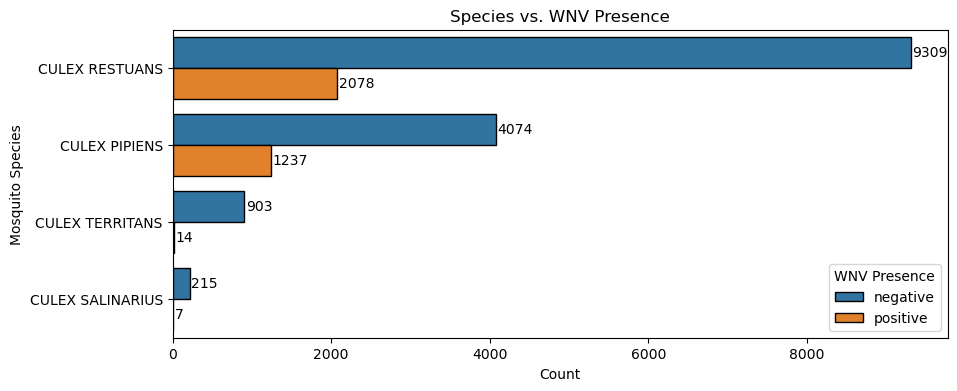

,WNV Present,Count
0,negative,14501
1,positive,3336


,Species,Count
0,CULEX PIPIENS,5311
1,CULEX RESTUANS,11387
2,CULEX SALINARIUS,222
3,CULEX TERRITANS,917


,Species,% WNV
0,CULEX PIPIENS,0.2329
1,CULEX RESTUANS,0.1825
2,CULEX SALINARIUS,0.0315
3,CULEX TERRITANS,0.0153


In [46]:
# Create figure
plt.figure(figsize = (10, 4))

# Bar chart by Species and WNV presence
ax = sns.countplot(y = 'Species', hue = 'WNV Present', data = species_wnv, edgecolor = 'black',
              order = ['CULEX RESTUANS', 'CULEX PIPIENS', 'CULEX TERRITANS', 'CULEX SALINARIUS'])

# Update plot properties
ax.set_title('Species vs. WNV Presence')
ax.set_xlabel('Count')
ax.set_ylabel('Mosquito Species')
ax.legend(title = 'WNV Presence', loc = 'lower right')

# Add labels to the bars at the end
label_offset = 20
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(width)}', (width + label_offset, y + height/2), 
                ha = 'left', va = 'center', fontsize = 10, color = 'black')

# Shows plot
plt.show()

# Printed the results of the calculations from above for easier viewing
display(f_count_by_wnv)
display(f_species_counts)
display(wnv_presence_percentage)

In examining the presence and absence of WNV, it becomes evident that a significant majority of mosquitoes captured do not carry the virus. This trend persists across various mosquito species. Notably, while the `CULEX RESTUANS` species tops the charts in terms of numbers of occurrences with WNV, this is influenced by its overall prevalence in the dataset. Upon closer inspection, it's `CULEX PIPIENS` that is the species with the highest likelihood of carrying WNV when considering the ratio of infected mosquitoes to total occurrences. Thus, while `CULEX RESTUANS` has more occurrences, it's **`CULEX PIPIENS` that presents the highest probability of WNV transmission**.

#### Number of Mosquitoes by Trap Type <a class="anchor" id="number-of-mosquitoes-by-trap-type"></a>

Next, we will be exploring the relationship between the number of mosquitoes and the trap type. To do that, we need to group the data by `Trap type` and sum up the `Mosquito number` for each group. It will also be interesting to see how efficient each trap type is.

In [47]:
# Groups the data by "Trap type" and sums the mosquito number per "Trap type"
trap_type_sum = mosquito_dfc.groupby('Trap type')['Mosquito number'].sum()

# Reorder the categories
desired_order = ['OVI', 'SENTINEL', 'CDC', 'GRAVID']
trap_type_sum = trap_type_sum.reindex(desired_order)

# Place in a dataframe
trap_type_sum.to_frame()

,Mosquito number
Trap type,
OVI,1
SENTINEL,5134
CDC,9514
GRAVID,171905


In [48]:
# Total number of traps for each trap type
trap_type_count = mosquito_dfc['Trap type'].value_counts()

# Calculate the average number of mosquitoes caught per trap for each trap type
trap_efficiency = round((trap_type_sum / trap_type_count), 3).reset_index(name = 'Trap Efficiency').rename(columns = {'index': 'Trap Type'})

The data is now ready to be plotted. We will be using a horizontal bar chart to visualize the data.

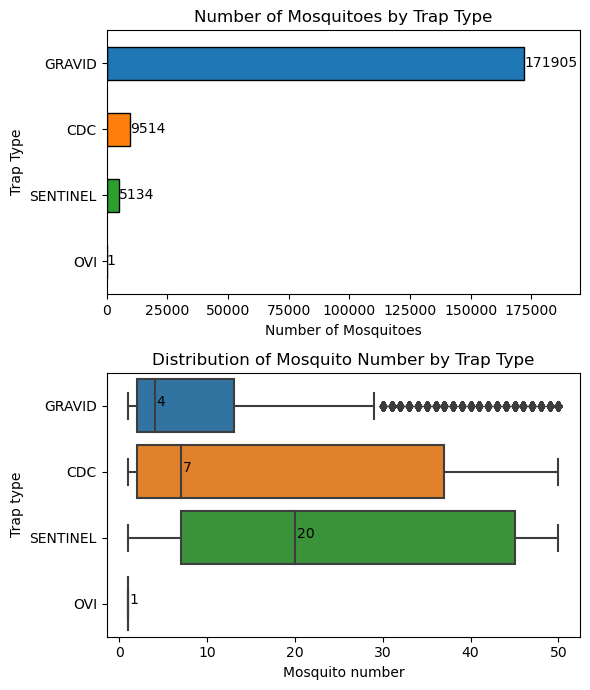

,Trap Type,Trap Efficiency
0,CDC,17.985
1,GRAVID,10.054
2,OVI,1.000
3,SENTINEL,24.565


In [60]:
# Creates subplots, two rows, one columns (2 bar charts)
plt.subplots(2, 1, figsize = (6, 7))

# Horizontal bar chart of Number of Mosquitoes by Trap Type
plt.subplot(2, 1, 1)
my_colors = ['tab:red', 'tab:green', 'tab:orange', 'tab:blue']
ax = trap_type_sum.plot.barh(x = 'Trap Type', y = 'Mosquito number', color = my_colors, edgecolor = 'black')

# Box plot of Number of Mosquitoes by Trap Type
plt.subplot(2, 1, 2)
desired_order = ['GRAVID', 'CDC', 'SENTINEL', 'OVI']
bx = sns.boxplot(data = mosquito_dfc, x = 'Mosquito number', y = 'Trap type', order = desired_order)

# Update plot properties
ax.set_xlabel('Number of Mosquitoes')
ax.set_ylabel('Trap Type')
ax.set_title('Number of Mosquitoes by Trap Type')
ax.set_xlim(0,195000)
bx.set_title('Distribution of Mosquito Number by Trap Type')

# Adds labels to the data bars
ax.bar_label(ax.containers[0])

# Add median labels to the plot
medians = mosquito_dfc.groupby('Trap type')['Mosquito number'].median()
vertical_offset = mosquito_dfc['Mosquito number'].median() * 0.05 

# Iterate over the desired order
for i, trap_type in enumerate(desired_order):
    median_value = int(medians[trap_type])  # Convert median value to integer
    bx.text(median_value + vertical_offset, i, f'{median_value}', 
            horizontalalignment='left', size='medium', color='black')

# Makes sure there is no overlap in plots
plt.tight_layout()

# Shows the subplots
plt.show()

# Printed the results of the calculations from above for easier viewing
trap_efficiency

| Trap Type | Description|
| :-: | :- |
| SENTINEL | Mimics the motions and chemicals produced by<br>humans.
| OVI | Short for Oviposition. Mimics breeding site for<br>female mosquitoes.
| GRAVID | Trap is baited with aged organic material-filled<br>water to attract female mosquitoes for egg laying.
| CDC | Light is used to attract mosquitoes.

In the horizontal bar chart, it's evident that the `GRAVID` trap type captures the most mosquitoes than the others, accounting for approximately 92% of all mosquitoes captured. Despite its prevalence, the trap type boasting the highest efficiency in mosquito capture is the `SENTINEL`, accounting for 25% of the total catch. This disparity in effectiveness could be attributed to the overwhelming use of `GRAVID` traps, constituting roughly 96% of all traps deployed ([as indicated in the distribution chart](#trap-type-distribution)). Examining the box plot, we observe that the `SENTINEL` trap type exhibits a median of 20, indicative of its consistent capture of a greater number of mosquitoes (exceeding 20) across multiple instances. Conversely, the `GRAVID` trap type presents a median of 4, suggesting it captures fewer mosquitoes in a single instance compared to the `SENTINEL`. Further insight from the accompanying table detailing each trap type sheds light on why `SENTINEL` traps excel in single-capture scenarios.

### Number of Mosquitoes by Number of Traps and WNV Prevalence per Year <a class="anchor" id="mosquitoes-by-traps-and-wnv-per-year"></a>

Another relationship we want to explore is the number of mosquitoes compared to the number of traps per year. We can assess how effectively traps are capturing mosquitoes. A higher number of observations relative to the number of mosquitoes may indicate a higher trapping success rate. We can also explore WNV prevalence per year. These two explorations could reveal patterns in mosquito activity and disease transmission.

First, we want to sum the number of mosquitoes and count the number of traps by year. We can also create a column that represents the ratio of mosquitoes to observations for each year. This ratio provides insight into the density of mosquitoes relative to the frequency of observations in the given year. A higher ratio indicates a higher density of mosquitoes per observation, while a lower ratio indicates a lower density.

For WNV prevalence, we will calculate the total number of mosquitoes per year by presence of WNV. We will also include a column that calculates the percentage of absence or presence of WNV of the total number of mosquitoes per year.

In [50]:
# Sums the number of mosquitoes and counts the number of traps by year
yearly_data = mosquito_dfc.groupby('Year').agg({'Mosquito number': 'sum', 'Year': 'count'})
yearly_data.columns = ['Total Mosquitoes', 'Total Observations']

# Create a new column with the ratio of total mosquitoes to total observations
yearly_data['Mosquitoes to Observations Ratio'] = round(yearly_data['Total Mosquitoes'] / yearly_data['Total Observations'], 3)

yearly_data

,Total Mosquitoes,Total Observations,Mosquitoes to Observations Ratio
Year,,,
2007,24156,2106,11.470
2008,3882,984,3.945
2009,5462,1129,4.838
2010,7363,1348,5.462
2011,7256,1085,6.688
2012,10703,1323,8.090
2013,22855,1559,14.660
2014,29767,1990,14.958
2015,10332,1121,9.217


In [51]:
# Group the data by year and WNV presence, and calculate the total number of mosquitoes
yearly_wnv_data = mosquito_dfc.groupby(['Year', 'WNV Present'])['Mosquito number'].sum().unstack(fill_value=0)

# Calculate the percentage of positive WNV presence for each year
yearly_wnv_data['negative WNV'] = round((yearly_wnv_data['negative'] / dfc_year), 3)

# Calculate the percentage of positive WNV presence for each year
yearly_wnv_data['positive WNV'] = round((yearly_wnv_data['positive'] / dfc_year), 3)

yearly_wnv_data

WNV Present,negative,positive,negative WNV,positive WNV
Year,,,,
2007,13225,10931,0.547,0.453
2008,3709,173,0.955,0.045
2009,5394,68,0.988,0.012
2010,7028,335,0.955,0.045
2011,7038,218,0.970,0.030
2012,5825,4878,0.544,0.456
2013,13859,8996,0.606,0.394
2014,19106,10661,0.642,0.358
2015,8302,2030,0.804,0.196


The data is ready to visualize. We will create one plot containing two lines, total number of mosquitoes and total number of traps, to see the changes over time in both groups. We will also create a stacked bar chart that graphs the total number of mosquitoes by WNV presence. We can include the percentage of the presence of WNV for each year on top of each bar to better visualize how much of the total number of mosquitoes carried WNV.

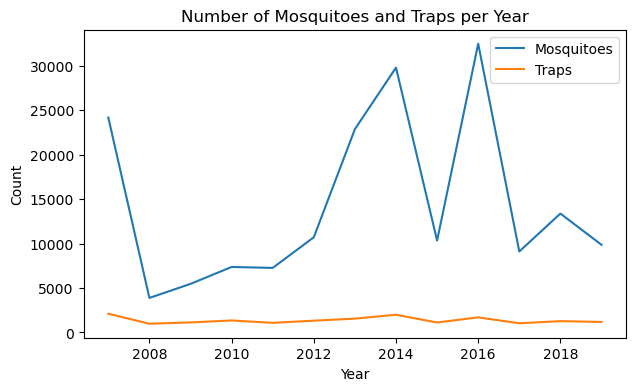

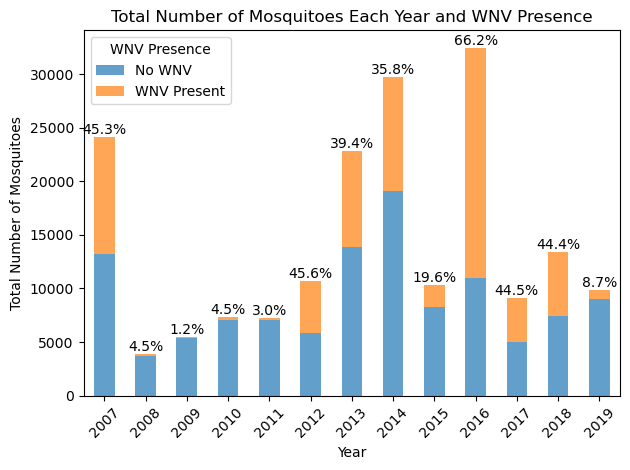

,Total Mosquitoes,Total Observations,Mosquitoes to Observations Ratio
Year,,,
2007,24156,2106,11.470
2008,3882,984,3.945
2009,5462,1129,4.838
2010,7363,1348,5.462
2011,7256,1085,6.688
2012,10703,1323,8.090
2013,22855,1559,14.660
2014,29767,1990,14.958
2015,10332,1121,9.217


In [52]:
# Plot number of mosquitoes per year and total observations (traps) per year
plt.figure(figsize=(7, 4))
ax = yearly_data['Total Mosquitoes'].plot(color = 'tab:blue', label = 'Mosquitoes')
yearly_data['Total Observations'].plot(color = 'tab:orange', label = 'Traps')

# Plot total number of mosquitoes by absence or presence of WNV
bx = yearly_wnv_data.plot(kind = 'bar', stacked = True, color = ['tab:blue', 'tab:orange'], alpha = 0.7)

# Updating plot properties
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Number of Mosquitoes and Traps per Year')
ax.legend()
bx.set_title('Total Number of Mosquitoes Each Year and WNV Presence')
bx.set_xlabel('Year')
bx.set_ylabel('Total Number of Mosquitoes')
bx.set_xticklabels(bx.get_xticklabels(), rotation = 45)
bx.legend(title = 'WNV Presence', labels = ['No WNV', 'WNV Present'])

# Add data labels for WNV positive data
for i, (index, row) in enumerate(yearly_wnv_data.iterrows()):
    bx.text(i, row['negative'] + row['positive'], f"{row['positive WNV']*100:.1f}%", ha = 'center', va = 'bottom')

# Makes sure there is no overlap in plots
plt.tight_layout()

# Show the plot
plt.show()

# Can include the table above for better visibility
yearly_data

Upon reviewing the initial two plots, it's evident that the years **2007, 2013, 2014, and 2016** stand out with the highest mosquito counts. A closer look at the accompanying table reveals that these particular years witnessed a greater deployment of traps, which likely contributed to the increased mosquito capture. Interestingly, a clear pattern regarding positive WNV cases across the years isn't immediately discernible. While years with higher mosquito counts tend to exhibit higher percentages of positive WNV, notable instances of positive WNV are also observed in other years (2012, 2017, and 2018).

## Conclusion <a class="anchor" id="conclusion"></a>

These are the conclusions from the exploratory data analysis.

- The peak activity of mosquito capture occurs during the summer months, notably in July and August. This trend reflects the heightened activity of mosquitoes during the warmer periods of the year.
- Predominantly, the captured mosquitoes are devoid of the WNV. Among the various species, `CULEX RESTUANS` emerges as the most frequently captured, closely followed by `CULEX PIPIENS`. Despite being the second most captured species, `CULEX PIPIENS` exhibits the highest likelihood of transmitting WNV, with approximately 23% of its total catch testing positive for the virus.
- While `GRAVID` trap type captures the majority of mosquitoes, the `SENTINEL` trap type demonstrates superior efficiency. This difference is attributed to the widespread use of `GRAVID` traps. The `SENTINEL` trap consistently captures a larger number of mosquitoes per instance, suggesting its efficacy in single-capture scenarios.

**To optimize the capture of mosquitoes carrying WNV, we would strategically plan to trap them during peak activity periods, predominantly in July and August, when mosquito populations surge. Leveraging a significant number of `SENTINEL` traps, previously seen for their efficacy in mosquito capture, would be paramount. Additionally, prioritizing the capture of `CULEX PIPIENS` mosquitoes, known for their heightened likelihood of carrying the virus, would enhance the targeted approach, increasing the probability of capturing WNV-carrying specimens.**



## Other Visualizations

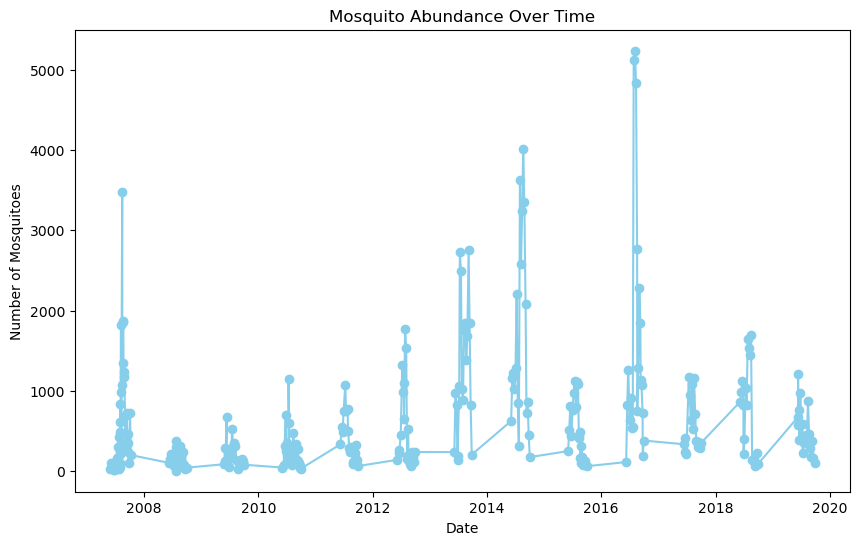

In [53]:
# Group data by date and calculate sum of mosquitoes for each date
daily_mosquito_counts = mosquito_dfc.groupby('Date')['Mosquito number'].sum()

# Create time series plot
plt.figure(figsize = (10, 6))
plt.plot(daily_mosquito_counts.index, daily_mosquito_counts, marker = 'o', color = 'skyblue', linestyle = '-')

# Updating plot properties
plt.title('Mosquito Abundance Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Mosquitoes')

# Show plot
plt.show()

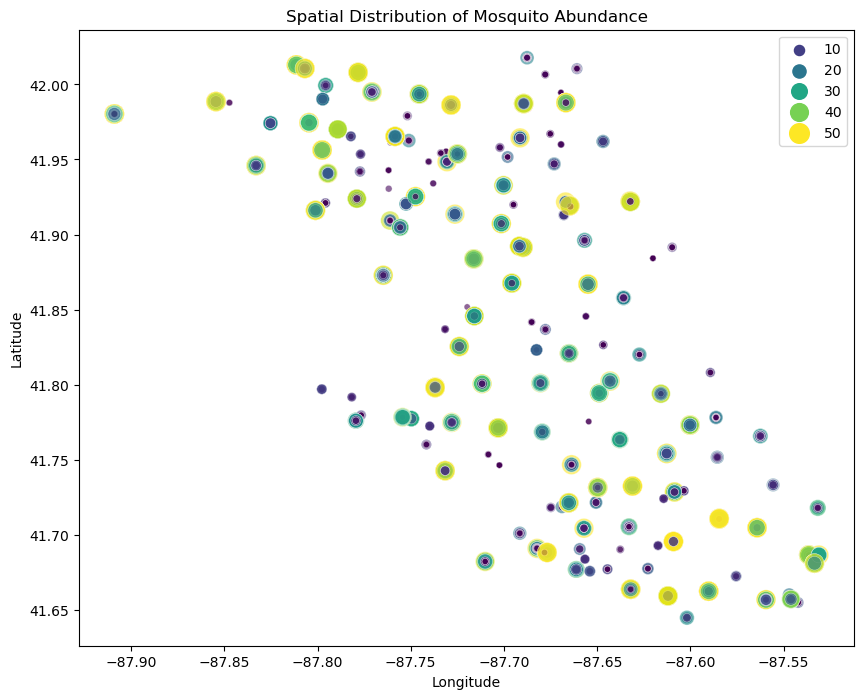

In [58]:
# Create a scatter plot of latitude and longitude
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Lon', y = 'Lat', data = mosquito_dfc, hue = 'Mosquito number', 
                size = 'Mosquito number', sizes = (20, 200), palette = 'viridis', alpha = 0.6)

# Update plot properties
plt.title('Spatial Distribution of Mosquito Abundance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Customize legend
plt.legend()

# Show the plot
plt.show()

[[Back to top]](#toc)